# 4.10 Creating demographic profiling for Step 5

### This script contains the following points:

#### 1. Create a family flag using fam_status and n_dependants
#### 2. Create a flag indicating a senior citizen and regular adult with Age
#### 3. Create an income flag classifying variations based on statistics
#### 4. Export the dataframe with the new column

In [54]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [55]:
# Creating a path to data

path = r'/Users/nekow/Documents/Instacart Basket Analysis'

In [56]:
# Importing regular customer dataframe

insta_demo_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_act_cust.pkl'))

In [57]:
# Dropping customer activity

insta_demo = insta_demo_2.drop(columns = ['customer_activity'])

## 1. Create a family flag using fam_status and n_dependants

In [58]:
# Checking value counts of integers in the fam_status column

insta_demo['fam_status'].value_counts(dropna = False)

fam_status
married                             617169
single                              146121
divorced/widowed                     75132
living with parents and siblings     42793
Name: count, dtype: int64

In [59]:
# Checking value counts in the number of dependant column

insta_demo['n_dependants'].value_counts(dropna = False)

n_dependants
0    221253
2    220687
3    220556
1    218719
Name: count, dtype: int64

In [60]:
# creation of the first diversifying column with dependants and marital status

def user_fam(row):
    if (row['fam_status'] == 'married') and (row['n_dependants'] >= 1):
        return 'young family'
    elif (row['fam_status'] == 'single') and (row['n_dependants'] == 0):
        return 'single adult'
    elif (row['fam_status'] == 'divorced/widowed') and (row['n_dependants'] == 0 ):
        return 'previously married adult'
    elif (row['fam_status'] == 'living with parents and siblings') and (row['n_dependants'] >= 1):
        return 'single parent'
    else:
        return 'other'

In [61]:
# applying the new column to the dataframe

insta_demo['family type'] = insta_demo.apply(user_fam, axis=1)

In [62]:
# Checking the application for any null values or "other" flags

insta_demo['family type'].value_counts(dropna = False)

family type
young family                617169
single adult                146121
previously married adult     75132
single parent                42793
Name: count, dtype: int64

## 2. Create a flag indicating a senior citizen and regular adult with Age

In [63]:
# creation of a flag to indicate whether buyers were senior citizens or not

def parental(row):
    if (row['Age'] < 40):
        return 'young adult'
    elif (row['Age'] < 65 and row['Age'] >= 40):
        return 'middle aged adult'
    else:
        return 'senior citizen'

In [64]:
# applying the new flags to the dataframe

insta_demo['age group'] = insta_demo.apply(parental, axis=1)

In [65]:
# checking the value counts for any null values or "other" columns

insta_demo['age group'].value_counts(dropna = False)

age group
middle aged adult    345617
young adult          302423
senior citizen       233175
Name: count, dtype: int64

## 3. Create an income flag classifying variations based on statistics

In [66]:
# checking values of the income information for the average calculations

insta_demo['income'].describe()

count    881215.000000
mean     100011.216685
std       44898.025592
min       25911.000000
25%       66988.000000
50%       96793.000000
75%      128420.000000
max      593901.000000
Name: income, dtype: float64

In [67]:
insta_demo['income'].max()

593901

In [68]:
insta_demo['income'].min()

25911

In [69]:
insta_demo['income'].mean()

100011.21668491798

In [75]:
# creation of a flag for a range of median incomes

insta_demo.loc[(insta_demo['income'] > 100000), 'income_bracket'] = 'middle class income'

/var/folders/hs/djjm__mn4d33wxms4t4q0flh0000gp/T/ipykernel_28611/1448326207.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'middle class income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  insta_demo.loc[(insta_demo['income'] > 100000), 'income_bracket'] = 'middle class income'


In [76]:
# creation of a flag for the lower average income brackets

insta_demo.loc[(insta_demo['income'] <= 100000) & (insta_demo['income'] > 0), 'income_bracket'] = 'lower class income'

In [77]:
# checking the values of the newly made column

insta_demo['income_bracket'].value_counts(dropna = False)

income_bracket
lower class income     476267
middle class income    404948
Name: count, dtype: int64

In [78]:
age_income_crosstab = pd.crosstab(insta_demo['age group'], insta_demo['income bracket'],dropna = False)

(array([0, 1, 2]),
 [Text(0, 0, 'middle aged adult'),
  Text(1, 0, 'senior citizen'),
  Text(2, 0, 'young adult')])

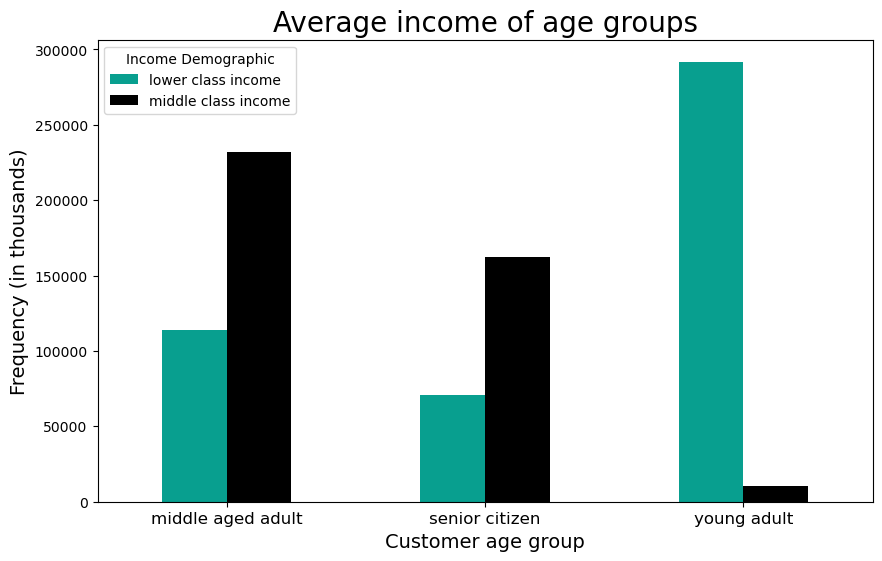

In [79]:
age_income_bar = age_income_crosstab.plot(kind = 'bar',figsize=(10,6),color=['#089f8f', '#000000']) 
age_income_bar.legend(title = 'Income Demographic') 
plt.title('Average income of age groups', fontsize = 20) 
plt.ylabel('Frequency (in thousands)',fontsize=14) 
plt.xlabel('Customer age group',fontsize=14) 
plt.xticks(rotation=0,fontsize=12)

In [80]:
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_income_bar.png'))

In [81]:
family_income_crosstab = pd.crosstab(insta_demo['family type'], insta_demo['income bracket'],dropna = False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'previously married adult'),
  Text(1, 0, 'single adult'),
  Text(2, 0, 'single parent'),
  Text(3, 0, 'young family')])

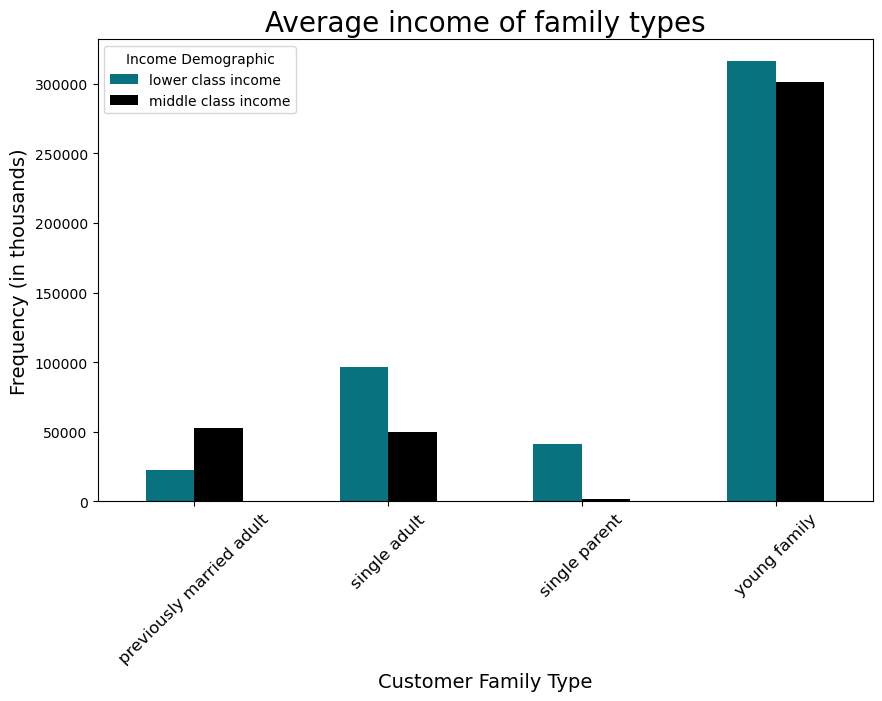

In [37]:
family_income_bar = family_income_crosstab.plot(kind = 'bar',figsize=(10,6),color=['#08737f', '#000000']) 
family_income_bar.legend(title = 'Income Demographic') 
plt.title('Average income of family types', fontsize = 20) 
plt.ylabel('Frequency (in thousands)',fontsize=14) 
plt.xlabel('Customer Family Type',fontsize=14) 
plt.xticks(rotation=45,fontsize=12)

In [38]:
family_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','fam_income.'))

## 4. Export the dataframe with the new columns

In [39]:
# exporting the new dataframe

insta_demo.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_demo.pkl'))